This module explains the basics of optimization in ML and includes a simple implementation of gradient descent.

In [0]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
np.random.seed(1337)

kwargs = {'linewidth' : 3.5}
font = {'weight' : 'normal', 'size'   : 24}
matplotlib.rc('font', **font)

def error_plot(ys, yscale='log'):
  plt.figure(figsize=(5, 5))
  plt.xlabel('Step')
  plt.ylabel('Error')
  plt.yscale(yscale)
  plt.plot(range(len(ys)), ys, **kwargs)

Let's now implement GD in one line! This is probably not memory efficient but useful to visualize what is going on.

In [0]:
def gradient_descent(init, steps, grad):
  xs = [init]
  for step in steps:
    xs.append(xs[-1] - step * grad(xs[-1])) 
  return xs

Toy example.

In [0]:
def quadratic(x):
  return 0.5*(x-7).dot(x-7)

def quadratic_gradient(x):
  return x-7

Test your GD optimizer!

In [0]:
x0 = np.random.normal(0,1,(1000))
_, xout = gradient_descent(x0,[1.0],quadratic_gradient)

OK! looks like this ran quickly. In fact, for simple parabolic functions like this, GD optimizes in 1 step.

In [0]:
xout.shape


(1000,)

However, if we choose a smaller learning rate, things take longer.

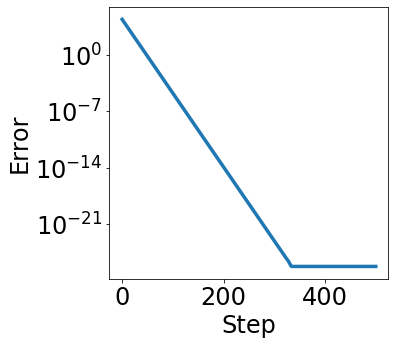

In [0]:
xs = gradient_descent(x0, [0.1]*500, quadratic_gradient)
error_plot([quadratic(x) for x in xs])

Alright! Things seem to be converging. Lets now do linear regression. 

In [0]:
def MSE(X,y,w):
  return 0.5*np.linalg.norm(X.dot(w)-y)**2

def MSE_gradient(X,y,w):
  return X.T.dot(X.dot(w)-y)

We will cook up some fake data where the optimal regressor is known, so that we can compare errors.

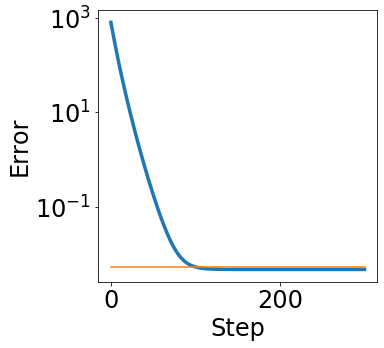

In [0]:
n,d = 100,10
X = np.random.normal(0,1,(n,d))
wtrue = np.random.normal(0,1,d)
noise = np.random.normal(0,0.01,n)
y = X.dot(wtrue) + noise

objective = lambda w: MSE(X,y,w)
gradient = lambda w: MSE_gradient(X,y,w)

w0 = np.random.normal(0,1,d)
ws = gradient_descent(w0,[0.001]*300,gradient)
error_plot([objective(w) for w in ws])
plt.plot(range(len(ws)),[MSE(X,y,wtrue)]*len(ws))

Neat! The final MSE we get is very close to the noise level, which is basically as good as we can hope to do.

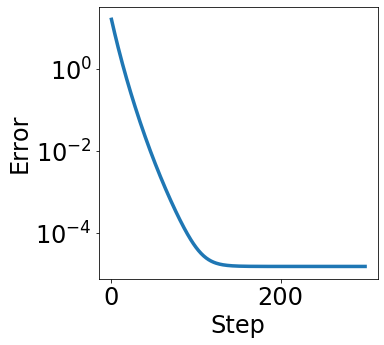

In [0]:
error_plot([np.linalg.norm(w-wtrue)**2 for w in ws])

Play around with various parameters (step size, epochs, etc) to see what happens.